## Importing Necessary Libraries
---



---



In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

## Load preprocessed data
---



---


In [2]:
X_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_train.pkl")
X_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X_test.pkl")
y_train = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_train.pkl")
y_test = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y_test.pkl")
X = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/X.pkl")
y = pd.read_pickle("/Users/pranavkhot/Documents/Fetal Health Project/data/y.pkl")  

X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# One-hot encode the labels using Keras' to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

## Building the LSTM Model
---



---

In [3]:
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train_encoded.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


## Training the Model
---



---

In [4]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded), verbose=2)


Epoch 1/100
54/54 - 1s - loss: 1.2122 - accuracy: 0.7824 - val_loss: 1.0545 - val_accuracy: 0.8263 - 743ms/epoch - 14ms/step
Epoch 2/100
54/54 - 0s - loss: 0.8761 - accuracy: 0.8382 - val_loss: 0.7070 - val_accuracy: 0.8545 - 70ms/epoch - 1ms/step
Epoch 3/100
54/54 - 0s - loss: 0.5955 - accuracy: 0.8518 - val_loss: 0.5081 - val_accuracy: 0.8685 - 68ms/epoch - 1ms/step
Epoch 4/100
54/54 - 0s - loss: 0.4645 - accuracy: 0.8618 - val_loss: 0.4186 - val_accuracy: 0.8709 - 70ms/epoch - 1ms/step
Epoch 5/100
54/54 - 0s - loss: 0.4032 - accuracy: 0.8635 - val_loss: 0.3714 - val_accuracy: 0.8662 - 74ms/epoch - 1ms/step
Epoch 6/100
54/54 - 0s - loss: 0.3688 - accuracy: 0.8659 - val_loss: 0.3421 - val_accuracy: 0.8732 - 72ms/epoch - 1ms/step
Epoch 7/100
54/54 - 0s - loss: 0.3492 - accuracy: 0.8641 - val_loss: 0.3213 - val_accuracy: 0.8779 - 71ms/epoch - 1ms/step
Epoch 8/100
54/54 - 0s - loss: 0.3311 - accuracy: 0.8741 - val_loss: 0.3070 - val_accuracy: 0.8803 - 68ms/epoch - 1ms/step
Epoch 9/100
54

## Model Evaluation
---



---

In [5]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_true, y_pred_classes) * 100
f1 = f1_score(y_true, y_pred_classes, average='weighted') * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"F1 Score: {f1:.2f}%")

14/14 [==============================] - 0s 646us/step
Accuracy: 92.96%
F1 Score: 92.83%


## Confusion Matrix and Classification Report
---



---

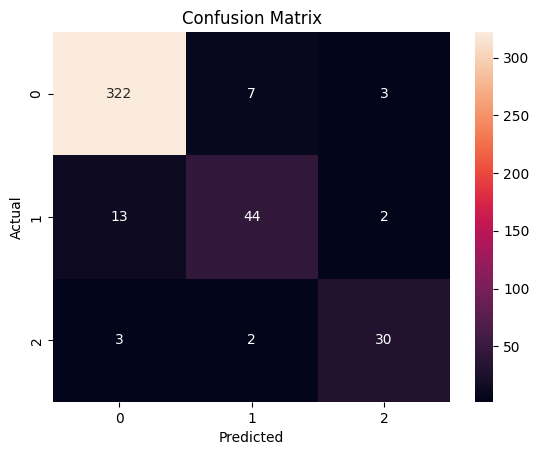

In [6]:
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [11]:
# Assuming y_pred_classes are your predicted class labels from the LSTM model
# and y_test contains the actual labels
class_names = ['Normal', 'Suspect', 'Pathologic']

# Generate the classification report
report = classification_report(y_test, y_pred_classes, target_names=class_names, output_dict=True)

# Convert the report to a DataFrame
df_report = pd.DataFrame(report).transpose()

# Print the classification report
print("\nClassification Report:")
print(tabulate(df_report, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))
print("\n")



Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ Normal       │        0.95 │     0.97 │       0.96 │    332.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Suspect      │        0.83 │     0.75 │       0.79 │     59.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ Pathologic   │        0.86 │     0.86 │       0.86 │     35.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │        0.93 │     0.93 │       0.93 │      0.93 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │        0.88 │     0.86 │       0.87 │    426.00 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │        0.93 │     0.93 │       0.93 │    426.00 │
╘══════════════╧═════════════╧════════

In [14]:
# Calculate Train Accuracy
y_pred_train = model.predict(X_train)
y_pred_train_classes = np.argmax(y_pred_train, axis=1)
y_train_true = np.argmax(y_train_encoded, axis=1)

train_accuracy = accuracy_score(y_train_true, y_pred_train_classes) * 100

# Calculate Test Accuracy and F1-Score
test_accuracy = accuracy_score(y_true, y_pred_classes) * 100
f1 = f1_score(y_true, y_pred_classes, average='weighted') * 100

# Calculate Overall Accuracy
overall_accuracy = (train_accuracy + test_accuracy) / 2

# Create a dictionary to store different metrics
metrics_dict_lstm = {
    "Model": ["LSTM"],
    "Train Accuracy": [f"{train_accuracy:.3f}%"],
    "Test Accuracy": [f"{test_accuracy:.3f}%"],
    "Overall Accuracy": [f"{overall_accuracy:.3f}%"],
    "F1-Score": [f"{f1:.3f}%"],
}

# Convert the dictionary to a DataFrame
metrics_df_lstm = pd.DataFrame(metrics_dict_lstm)

# Print the results
print("\nLSTM Model Metrics:")
print(tabulate(metrics_df_lstm, headers='keys', tablefmt='fancy_grid', showindex=False))
# Save the DataFrame to a CSV file
metrics_df_lstm.to_csv("/Users/pranavkhot/Documents/Fetal Health Project/results/LSTM/lstm_metrics.csv", index=False)

print("Metrics saved to 'lstm_metrics.csv'")



54/54 [==============================] - 0s 594us/step

LSTM Model Metrics:
╒═════════╤══════════════════╤═════════════════╤════════════════════╤════════════╕
│ Model   │ Train Accuracy   │ Test Accuracy   │ Overall Accuracy   │ F1-Score   │
╞═════════╪══════════════════╪═════════════════╪════════════════════╪════════════╡
│ LSTM    │ 93.941%          │ 92.958%         │ 93.449%            │ 92.834%    │
╘═════════╧══════════════════╧═════════════════╧════════════════════╧════════════╛
Metrics saved to 'lstm_metrics.csv'


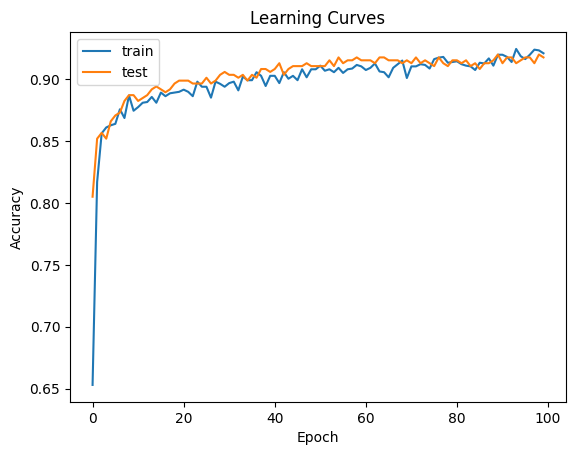

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Learning Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [15]:
import pickle

# Save the trained model to a file
with open('/Users/pranavkhot/Documents/Fetal Health Project/trained_models/LSTM.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("Model trained and saved to file.")

Model trained and saved to file.
